In [1]:
import warnings
warnings.filterwarnings("ignore")
    
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
fake_job_postings = pd.read_csv("C:\\Users\\SWADHIN\\OneDrive\\Desktop\\SEM2_FAKE_JOB\\fake_job_postings_cleaned3.csv")
fake_job_postings

,Unnamed: 0,telecommuting,has_company_logo,has_questions,fraudulent,ratio,e_ratio,r_ratio,r_edu_ratio,i_ratio,f_ratio,text,character_count
0,0,0,1,0,0,0.03,0.071,0.027,0.059,0.059,0.012,"Marketing Intern US, NY, New York We're Food52...",2713
1,1,0,1,0,0,0.03,0.071,0.027,0.059,0.059,0.012,"Audience Development Intern US, NY, New York W...",2728
2,2,0,1,1,0,0.00,0.075,0.027,0.059,0.059,0.012,"Marketing Trainee- Russian Market GR, I, Athen...",1759
3,3,0,1,1,0,0.00,0.075,0.027,0.059,0.059,0.012,"OUD: Stage Marketing 3. NL, UT, Amersfoort Sum...",2196
4,4,0,1,0,0,0.03,0.044,0.027,0.059,0.059,0.012,"Marketing Intern US, NY, New York Fusemachines...",3231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,0,0,0,0,0.05,0.044,0.031,0.020,0.114,0.000,Materials Manager (Hospital Experience Require...,750
17876,17876,0,0,0,0,0.00,0.044,0.057,0.046,0.134,0.000,Executive Assistant - Purchasing Department US...,1108
17877,17877,0,1,1,0,0.05,0.044,0.046,0.020,0.019,0.000,"Purchasing Director US, , Human capital is us...",5173
17878,17878,0,0,0,0,0.00,0.044,0.066,0.059,0.000,0.000,"Purchasing Agent US, MN, Ramsey Diamond Grap...",5009


In [37]:
X = fake_job_postings[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio','text', 'character_count']]
y = fake_job_postings['fraudulent']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 52)

In [39]:
X_train_num = X_train[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio', 'character_count']]
X_test_num = X_test[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio', 'character_count']]

In [40]:
kfold = model_selection.KFold(n_splits=10, random_state = 52, shuffle=True)

In [43]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB',MultinomialNB()))
models.append(('SGD',SGDClassifier()))

results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state = 52, shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train_num,y_train,cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name, cv_results.mean(),cv_results.std())
    print(msg)

LR : 0.959731 (0.004502)
DTC : 0.962288 (0.003481)
NB : 0.956775 (0.004899)
SGD : 0.951741 (0.005129)


AttributeError: 'AxesSubplot' object has no attribute 'set_xticklables'

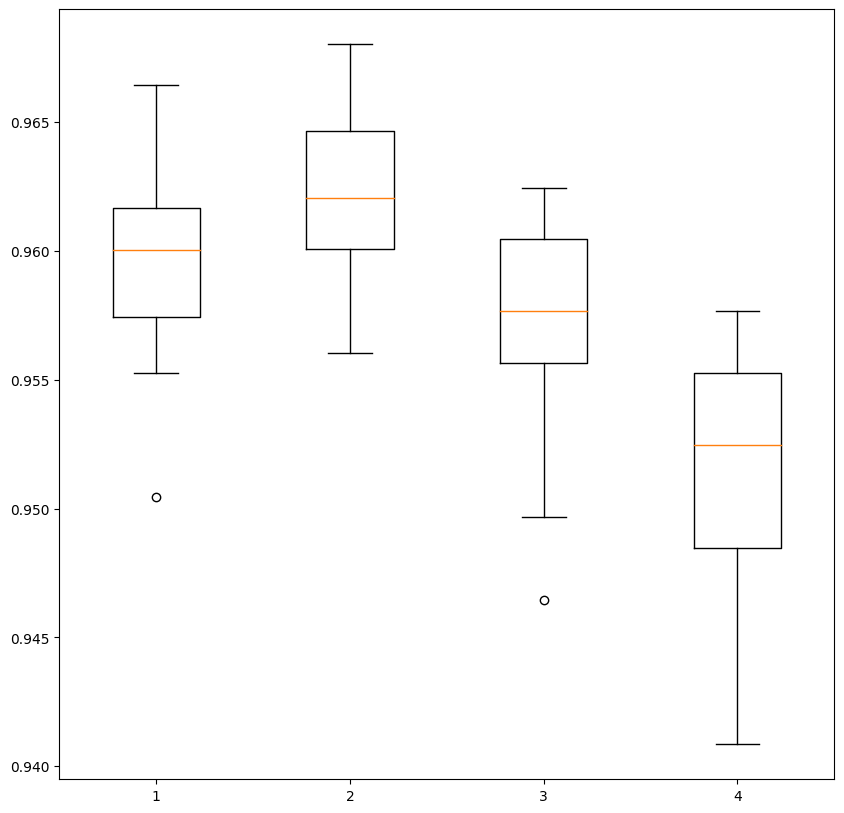

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklables(names)
plt.show

In [ ]:
def clean(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [45]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [47]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB',MultinomialNB()))
models.append(('SGD',SGDClassifier()))

results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state = 52, shuffle=True)
    cv_results = model_selection.cross_val_score(model,count_train,y_train,cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name, cv_results.mean(),cv_results.std())
    print(msg)

LR : 0.982502 (0.002686)
DTC : 0.978827 (0.002122)
NB : 0.965964 (0.005443)
SGD : 0.982742 (0.003337)


In [49]:
from sklearn import metrics
clf_log = SGDClassifier(loss='log').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.9843400447427293

In [54]:
from sklearn import tree
Dtc = tree.DecisionTreeClassifier()
Dtc = Dtc.fit(X_train_num,y_train)
pred_num = Dtc.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.9574944071588367

In [53]:
clf_num = SGDClassifier(loss='log').fit(X_train_num, y_train)
pred_num1 = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num1)

0.9515287099179717

In [55]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [56]:
metrics.accuracy_score(y_test, prediction_array)

0.9655108128262491

In [57]:
metrics.f1_score(y_test, prediction_array)

0.7095761381475668

In [58]:
prediction_array = []

for i, j in zip(pred_num1, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [59]:
metrics.accuracy_score(y_test, prediction_array)

0.9847129008202834

In [60]:
metrics.f1_score(y_test, prediction_array)

0.8366533864541833

In [61]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

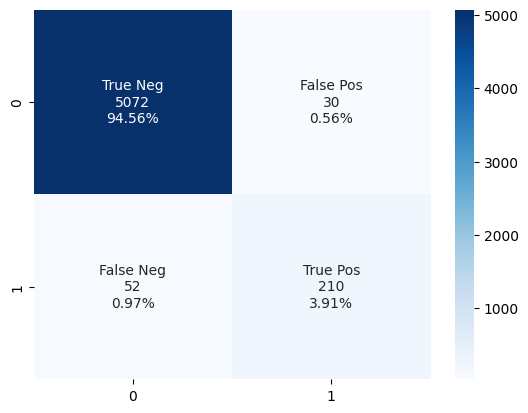

In [63]:
import seaborn as sns
group_names = ["True Pos","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');